# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

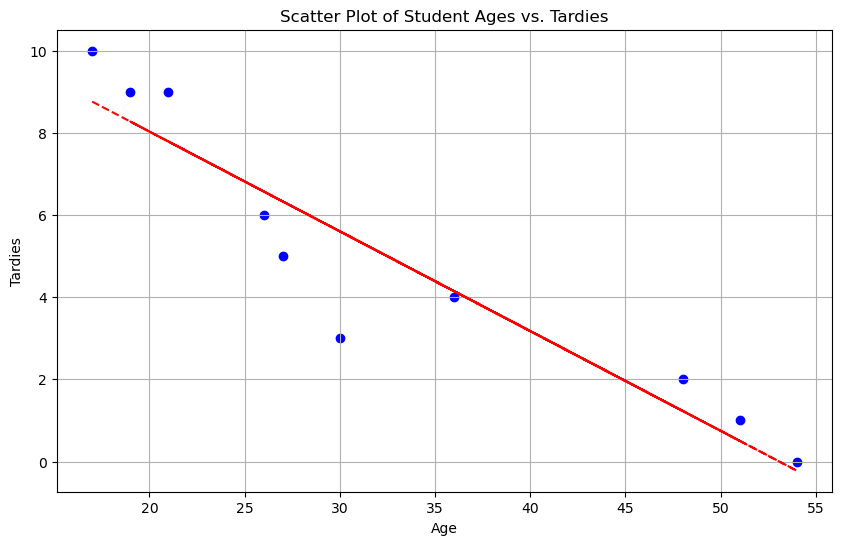

In [3]:
# Your code here
plt.figure(figsize=(10, 6))
plt.scatter(student_data['Age'], student_data['Tardies'], color='blue', marker='o')

z = np.polyfit(student_data['Age'], student_data['Tardies'], 1)
p = np.poly1d(z)
plt.plot(student_data['Age'], p(student_data['Age']), "r--")

plt.title('Scatter Plot of Student Ages vs. Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.grid(True)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*your explanation here*
# The trend line has a negative slope, indicating a negative correlation. It supports that younger students tend to have more tardies. 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# your code here
# Calculate the covariance
covariance = student_data['Age'].cov(student_data['Tardies'])
print(f'Covariance: {covariance}')

# Calculate the correlation coefficient
correlation = student_data['Age'].corr(student_data['Tardies'])
print(f'Correlation coefficient: {correlation}')

#Covariance indicates the direction of the linear relationship between variables
#Correlation coefficient measures both the direction and strength of the linear relationship
#Covariance value is -40.44 and the Correlation coefficient is -0.89.
# These values indicate a strong negative linear relationship between age and tardiness, meaning that younger students tend to have more tardies



Covariance: -45.56666666666666
Correlation coefficient: -0.9391626886887122


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
# your explanation here
from sklearn.metrics import mean_squared_error, r2_score

X = student_data[['Age']]
y = student_data['Tardies']

model = LinearRegression()
model.fit(X, y)

predictions = model.predict(X)


print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")


mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Intercept: 12.888803363135771
Coefficient: -0.2428207709159809
Mean Squared Error: 1.3319201847356268
R-squared: 0.8820265558250109


Plot your regression model on your scatter plot.

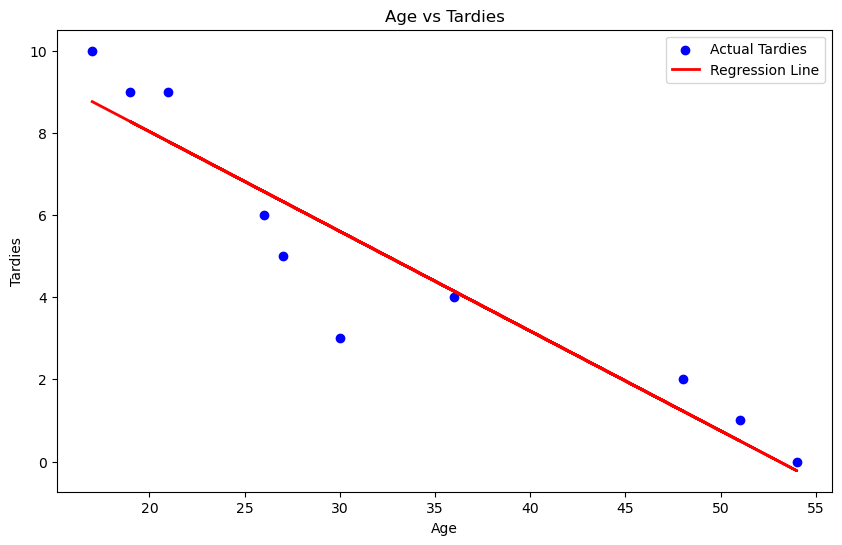

In [7]:
# Your code here.
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Tardies')
plt.plot(X, predictions, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Age vs Tardies')
plt.legend()
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*your explanation here*

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [11]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('/Users/gerardroca/Documents/IRONHACK/LABS/lab-regression-analysis-en/vehicles.csv')


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [14]:
# Your code here.
# Select relevant columns
variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
vehicles_selected = vehicles[variables]

correlation_matrix = vehicles_selected.corr()

co2_correlations = correlation_matrix['CO2 Emission Grams/Mile'].drop('CO2 Emission Grams/Mile')


print("Correlations with CO2 Emission Grams/Mile:")
print(co2_correlations)

# Based on the correlation values, we can determine the importance of each variable in relation to CO2 emissions.
# The variable with the highest absolute correlation value is likely to be the most important in determining CO2 emissions.
# Conversely, the variable with the lowest absolute correlation value provides the least amount of helpful information.

Correlations with CO2 Emission Grams/Mile:
Year                -0.222300
Cylinders            0.752393
Fuel Barrels/Year    0.986189
Combined MPG        -0.926229
Fuel Cost/Year       0.930865
Name: CO2 Emission Grams/Mile, dtype: float64


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [20]:
# Your code here.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']
target = 'CO2 Emission Grams/Mile'
vehicles_selected = vehicles[variables + [target]]

vehicles_selected = vehicles_selected.dropna()

X = vehicles_selected[variables]
y = vehicles_selected[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


# Multiple Linear Regression is suitable for predicting a single outcome variable based on multiple predictor variables.



Intercept: 755.6935073143338
Coefficients: [-0.31558675  1.79402632 19.23102729 -2.9335732   0.03197145]
Mean Squared Error: 289.8277440813781
R-squared: 0.9794542628636334


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [19]:
# Your code here.
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()

# Print the regression summary
print(model.summary())

                                   OLS Regression Results                                   
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          4.960e+06
Date:                     Tue, 18 Jun 2024   Prob (F-statistic):                        0.00
Time:                             16:32:06   Log-Likelihood:                     -1.2174e+05
No. Observations:                    28761   AIC:                                  2.435e+05
Df Residuals:                        28756   BIC:                                  2.435e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
                        coef    std err          t      P>|t|      [0.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here.

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [2]:
# Your response here.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*